<a href="https://colab.research.google.com/github/SilvioSodre13/Dio-Analise-Dados-Python-e-Pandas/blob/main/Dio_An%C3%A1lise_Explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-Importando as Bibliotecas e fazendo upload do arquivo


In [1]:
# Importando as bibliotecas e o estilo
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
# Upload do Arquivo
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [3]:
# Executando a leitura do Arquivo
df = pd.read_excel("AdventureWorks.xlsx")

In [4]:
# Visualizando as 05 primeras linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [5]:
# Verificando a quantidade de linhas e colunas
df.shape

(904, 16)

In [6]:
df.dtypes 

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [7]:
# Verificando a Receita Total ?
df['Valor Venda'].sum()

5984606.1426

In [8]:
# Criando a Coluna custo
df["Custo"] = df['Custo Unitário']*df["Quantidade"]

In [9]:
# Visualisando para verificar se a Coluna Custo foi criada
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [10]:
# Verificando o Custo Total
round(df["Custo"].sum(),2)

2486783.05

In [11]:
# Criando uma coluna de Lucro
df["Lucro"] = df['Valor Venda']-df["Custo"]

In [12]:
# Verificando se a coluna foi criada
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [13]:
# Calculando a Soma Total do Lucro e arredondanto o resultado para 02 casas decimais
round(df["Lucro"].sum(),2)

3497823.09

#2-Calculando o Tempo de Envio Para Cada Marca

In [14]:
 # Criando a Coluna "Tempo_Envio"
df["Tempo_Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days # dt.days para deixar somente o valor numerico para efetuar outros cálculos

df.head(1) # Visualizando para verificar se a coluna foi criada corretamente.

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [15]:
# Verificando o tipo da coluna Tempo_Envio
df['Tempo_Envio'].dtypes

dtype('int64')

In [16]:
# Calculando o tempo medio de envio , criando a varivel Media_Envio
Media_Envio = df.groupby('Marca')['Tempo_Envio'].mean().reset_index() # Reset_Index para deixar no formato tabela.
Media_Envio

,Marca,Tempo_Envio
0,Adventure Works,8.663866
1,Contoso,8.470930
2,Fabrikam,8.510121


#3-Missing Values


In [17]:
# Verificando valores se existem valores faltantes na base de dados
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_Envio       0
dtype: int64

#4-Identificando o Lucro, por Ano e a Marca


In [18]:
# Agrupando por : Ano e Marca
pd.options.display.float_format = '{:20,.2f}'.format # Configurando o formato dos numeros flutuantes para 02 casas decimais
df.groupby([df['Data Venda'].dt.year,'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [19]:
# Cálculo do Lucro/Ano , deixando o agrupamento no formato tabela usando .reset_index()
lucro_ano = df.groupby([df['Data Venda'].dt.year, "Marca"])['Lucro'].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [20]:
# Cálculo: Total de Produtos Vendidos
total_produto_vendido = df.groupby('Produto')["Quantidade"].sum().sort_values(ascending = True)
total_produto_vendido



Produto
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Black             1089
Headphone Adapter for Contoso Phone E130 White     25008
Headphone Adapter for Contoso Phone E130 Silver    25232
Name: Quantidade, dtype: int64

# 5.Usando Gráficos para ajudar na compreensão dos dados

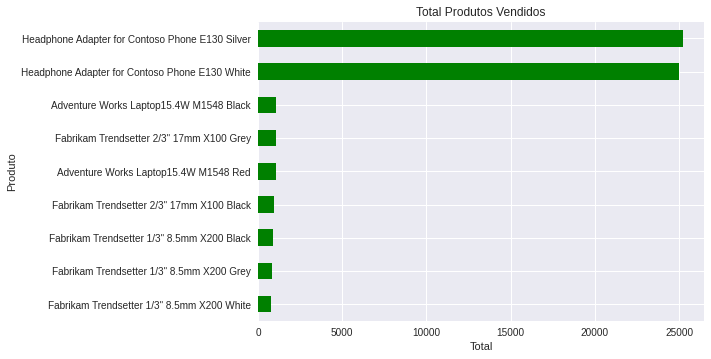

In [21]:
# Gráfico de Barras Horizontal: Total de Produtos Vendidos
total_produto_vendido.plot.barh(title ="Total Produtos Vendidos", color ='green')
plt.xlabel('Total')
plt.ylabel('Produto');

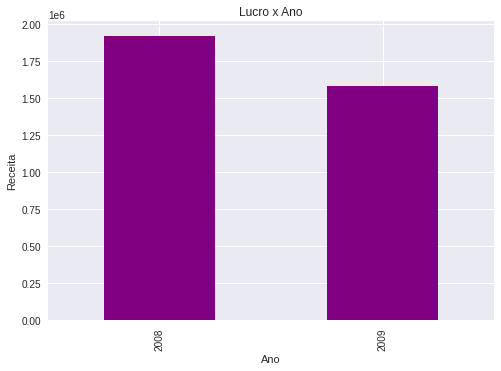

In [22]:
# Gráfico Barras: Lucro por Ano
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar(color ='purple',title = "Lucro x Ano")
plt.xlabel('Ano')
plt.ylabel('Receita');

In [23]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().reset_index()

,Data Venda,Lucro
0,2008,"1,920,077.71"
1,2009,"1,577,745.38"


In [24]:
# Selecionando as Vendas Apenas de 2009 
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [25]:
# Visualisando a df_2009
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


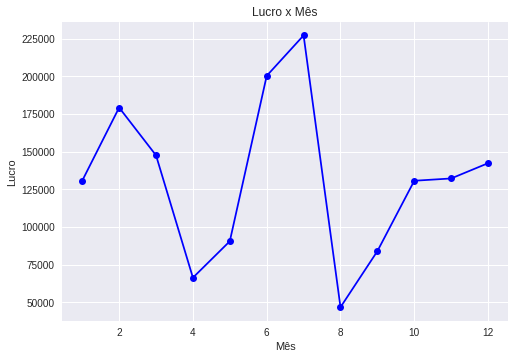

In [26]:
# Gráfico de linhas:Lucro Mensal
df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum().plot(title = 'Lucro x Mês',marker = 'o', color = 'blue')
plt.xlabel("Mês")
plt.ylabel("Lucro");

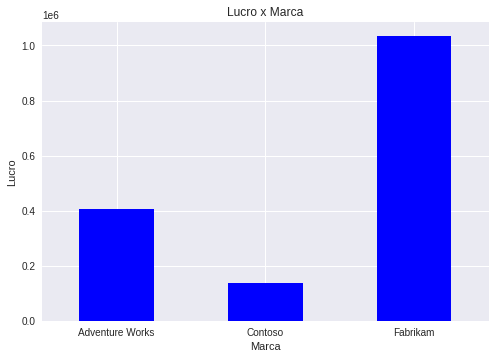

In [27]:
# Gráfico Barras : Lucro x Marca
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title = 'Lucro x Marca', color = 'blue')
plt.xlabel("Marca")
plt.ylabel('Lucro')
plt.xticks(rotation = "horizontal");

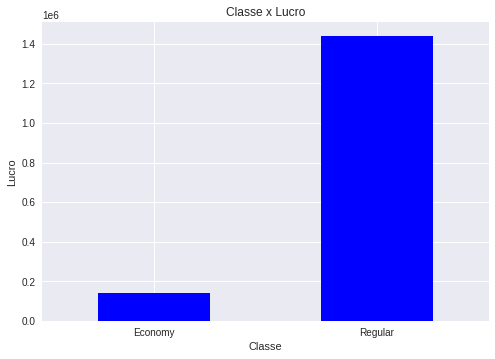

In [28]:
# Grafico de Barras : Lucro por Classe
df_2009.groupby("Classe")['Lucro'].sum().plot.bar(title = "Classe x Lucro",color ='blue')
plt.xlabel("Classe")
plt.ylabel('Lucro')
plt.xticks(rotation = 'horizontal');

In [31]:
df['Tempo_Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_Envio, dtype: float64

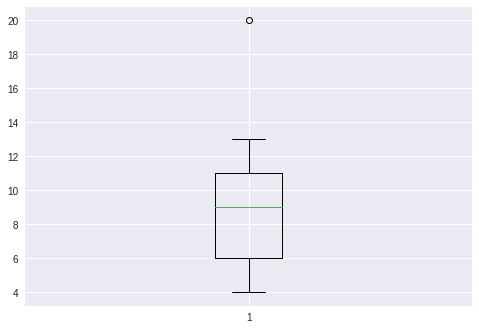

In [32]:
# Gráfico Boxplot do Tempo de Envio
plt.boxplot(df['Tempo_Envio']);

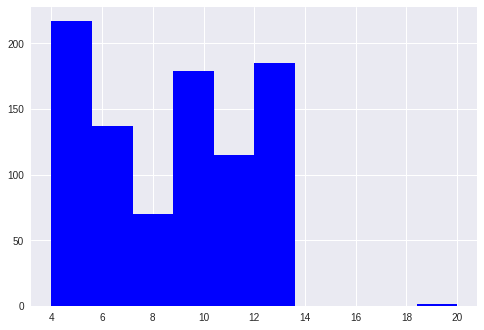

In [33]:
# Grafico Histograma:
plt.hist(df["Tempo_Envio"],color = "blue");


In [38]:
# Cálculo Valor Mínimo

df['Tempo_Envio'].min()

4

In [35]:
# Cálculo Valor Máximo
df["Tempo_Envio"].max()

20

In [36]:
# Identificando os outiliers
df[df['Tempo_Envio']==20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [37]:
# Salvando o novo arquivo em csv
df.to_csv('df_vendas_novo.csv', index = False)